<h1>Non Invasive Retroactive Location Tracking for Coronavirus. </h1>

People who contract coronavirus are often unaware of the places they have been, making it difficult to <a href="https://www.nytimes.com/article/flatten-curve-coronavirus.html">"flatten the curve”</a>.

As of 3/29, there have been over 660,000 cases of people contracting the coronavirus (COVID-19). 

For those who have tested postive for the coronavirus, tracking those in close and recent contact limits the spread of the virus. Contact tracing is a practice recomended by the <a href = "https://www.who.int/features/qa/contact-tracing/en/"> World Health Organization</a>.

This Jupyter notebook walks through how to download important data that will help you track where you were the past 30 days based on your past logins, helping with the recommended contact tracing. 

<b>All data is not collected or stored in any way by the developers of this program. </b> Moreover, since we are using Selenium, you can view all the interactions that occurs within your browser. 

All you need to do is to run every codeblock below to download the necessary data and visualize where you were the past 30 days! 

Then you can download the data and share it with others if you want. 

<b> Data Processing </b>

We are going to use Selenium to help streamline this process of gathering location data from \:
- Gmail Login History
- Facebook Login History [Will be completed after the hackathon]
- Netflix Login History [Will be completed after the hackathon]
- Google Maps Data [Will be completed after the hackathon]

What's cool about this proof of concept is that this code can be applied to various other web apps that you might use on a daily basis where you can extrapolate location information!



<b> Initiating Selenium Webdriver </b>

Before we get started, we need to have <a href="https://www.selenium.dev/">Selenium</a> installed. 

You'll need to download the ChromeDriver 73.0.3683.68 (https://chromedriver.storage.googleapis.com/index.html?path=73.0.3683.68/) for this to work

Follow steps from https://www.selenium.dev/selenium/docs/api/py/ which basically state:
1) Download the ChromeDriver 73.0.3683.68 (https://chromedriver.storage.googleapis.com/index.html?path=73.0.3683.68/)
(that's basically all you need to do)



<b>You have to follow the steps from the docs above to ensure that you can download the data correctly!</b>

All you need to do now is to read the text and run each code block individually using "Ctrl-Enter"


<h2>Gmail Login History Processing</h2>

We had to use a workaround to allow for logging into Gmail via Selenium. Run the code block below using Ctrl-Enter and then wait till you see the Gmail login

In [140]:
import pandas as pd
import time
from bs4 import BeautifulSoup
import re 
from datetime import datetime
from dateutil.parser import parse
import urllib.request
import json

# For testing
import random
import socket
import struct

# For mapping
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
# import pygal

In [141]:
from selenium import webdriver
from time import sleep

driver = webdriver.Chrome()
driver.get('https://stackoverflow.com/users/signup?ssrc=head&returnurl=%2fusers%2fstory%2fcurrent%27')
sleep(3)
driver.find_element_by_xpath('//*[@id="openid-buttons"]/button[1]').click()

Once you have logged in, run the coeblock below

In [142]:
driver.get('https://gmail.com')

Verify that you are now logged into Gmail. If not, start from the first codeblock from "Gmail Login History Processing" and start again. 

If you are logged into Gmail, run the next line of code to download some data that we will use for visualization!

In [143]:
driver.find_element_by_css_selector(".l8.LJOhwe").click()
driver.switch_to.window(driver.window_handles[1])

In [144]:
thead = driver.find_element_by_css_selector('.thead')
table = thead.find_element_by_xpath('..').get_attribute('innerHTML')
big_table = driver.find_elements_by_xpath("//table")[4].get_attribute('outerHTML')
df = pd.read_html(big_table)[0]
del df[0]
df = df.iloc[1:]

In [145]:
# Process data
def clean_ip(ip): 
    return ip[ip.find("(")+1:ip.find(")")]

def clean_times(t):
    temp = re.sub(r'\([^)]*\)', '', t).rstrip()
    if temp[0].isalpha():
        temp = datetime.strptime(temp, '%b %d').replace(2020)
    else:
        temp = datetime.today()
    return temp
df[1] = df[1].apply(clean_ip) 
df[2] = df[2].apply(clean_times)
df[3] = df[2]
df.columns = ['IP', 'Day', 'Day3']
# print(df)

In [146]:
countries = []
states = []
cities = []
lats = []
longs = []
for ip in df["IP"]:
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/" + ip) as url:
        data = url.read().decode()
        data = data.split("(")[1].strip(")")
        json_data = json.loads(data)
#         print(json_data)
        countries.append(json_data["country_name"])
        cities.append(json_data["city"])
        states.append(json_data["state"])
        lats.append(json_data["latitude"])
        longs.append(json_data["longitude"])
df['country'] = countries
df['city'] = cities
df['state'] = states
df['lat'] = lats
df['long'] = longs

In [147]:
print(df)

                                        IP                        Day  \
1    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399199   
2    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399212   
3    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399217   
4    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399221   
5    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399225   
6    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399229   
7    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399233   
8    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-28 00:00:00.000000   
9    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-27 00:00:00.000000   
10  2601:192:4180:1b30:28be:86a8:21ad:5b15 2020-03-27 00:00:00.000000   

                         Day3        country             city          state  \
1  2020-03-29 11:19:16.399199  United States  Wellesley Hills  Massachusetts   
2  2020-03-29 11:19:16.399212  Unite

In [148]:
# Here is some random data to make the visuals look interesting. Please leave commented out for real use.


# ONLY FOR TESTING
# countries = []
# states = []
# cities = []
# lats = []
# longs = []
# for ip in df["IP"]:
#    with urllib.request.urlopen("https://geolocation-db.com/jsonp/" + socket.inet_ntoa(struct.pack('>I', random.randint(1, 0xffffffff)))) as url:
#        data = url.read().decode()
#        data = data.split("(")[1].strip(")")
#        json_data = json.loads(data)
#        countries.append(json_data["country_name"])
#        cities.append(json_data["city"])
#        states.append(json_data["state"])
#        lats.append(json_data["latitude"])
#        longs.append(json_data["longitude"])
# df['country'] = countries
# df['city'] = cities
# df['state'] = states
# df['lat'] = lats
# df['long'] = longs
# print(df)

                                        IP                        Day  \
1    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399199   
2    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399212   
3    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399217   
4    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399221   
5    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399225   
6    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399229   
7    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399233   
8    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-28 00:00:00.000000   
9    2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-27 00:00:00.000000   
10  2601:192:4180:1b30:28be:86a8:21ad:5b15 2020-03-27 00:00:00.000000   

                         Day3         country       city           state  \
1  2020-03-29 11:19:16.399199           China       None         Sichuan   
2  2020-03-29 11:19:16.399212       Not foun

Since I've stayed in the same place for the past few days, here is an example with multiple data points to show how it could work more effectively 

In [149]:
# For cleaning up test data
df = df[df.lat != 'Not found']

days = [g for n, g in df.set_index("Day").groupby(pd.Grouper(freq='D'))]

This is your location data for the past few days:

                                                IP       Day3         country  city state      lat    long
Day                                                                                                       
2020-03-27   2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-27  United Kingdom  None  None  51.4964 -0.1224
2020-03-27  2601:192:4180:1b30:28be:86a8:21ad:5b15 2020-03-27           Japan  None  None    35.69  139.69


/home/ethanc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


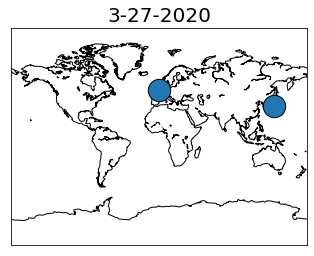

                                               IP       Day3 country    city           state    lat long
Day                                                                                                     
2020-03-28  2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-28  France  Antony  Hauts-de-Seine  48.75  2.3


/home/ethanc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


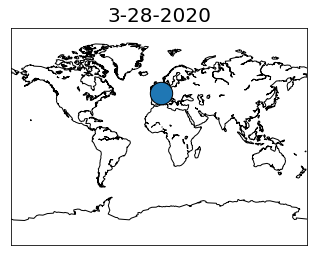

                                                               IP                       Day3        country     city    state      lat     long
Day                                                                                                                                            
2020-03-29 11:19:16.399199  2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399199          China     None  Sichuan  30.6667  104.067
2020-03-29 11:19:16.399217  2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399217     Mozambique     None     None   -18.25       35
2020-03-29 11:19:16.399221  2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399221  United States     None     None   37.751  -97.822
2020-03-29 11:19:16.399225  2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399225  United States  Orlando  Florida  28.6214 -81.4294
2020-03-29 11:19:16.399233  2601:192:4180:1b30:193:67ed:cef7:d7ca 2020-03-29 11:19:16.399233  United States     None     None   37.751  

/home/ethanc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


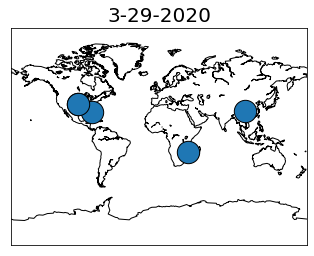

In [150]:
# Plot data for each day
# Based off of https://www.youtube.com/watch?v=XiZbrii49pI

%matplotlib inline
for day in days:
    if not day.empty:
        print(day.to_string())
    
        m = Basemap(projection='mill',
               llcrnrlat = -90,
               urcrnrlat = 90,
               llcrnrlon = -180,
               urcrnrlon = 180,
               resolution = 'c')

        m.drawcoastlines()

        sites_lat_y = day['lat'].tolist()
        sites_lon_x = day['long'].tolist()

        m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=500, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

        d = day["Day3"][0]
        plt.title(str(d.month) + "-" + str(d.day) + "-" + str(d.year), fontsize=20)
        plt.show()
    


<h1>Facebook Login History</h1>

In [120]:
driver = webdriver.Chrome()
driver.get('https://www.facebook.com/')

Wait till log in for Facebook

In [127]:
driver.get('https://www.facebook.com/settings?tab=security&section=sessions&view')


[]


In [139]:
data = driver.find_element_by_css_selector('div._k7f._15va._4-u2._4-u8')
# df = pd.read_html(big_table)[0]
# del df[0]
# df = df.iloc[1:]
# _k7f _15va _4-u2  _4-u8
# print(data)
data = data.find_elements_by_xpath("//*[@data-hover='tooltip']")
print(data)
print(len(data))
for el in data:
    print(location.text)

[<selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-50")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-51")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-52")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-53")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-26")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-54")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", element="0.3468262179412882-55")>, <selenium.webdriver.remote.webelement.WebElement (session="ee2b521e19e82ad86b02caf1f0d06c53", el